## 1. SetUp and Loading Data

### `1.1 Installing Dependencies`

In [1]:
!pip install tensorflow opencv-python matplotlib

     -------------------------------------- 455.9/455.9 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 35.6/35.6 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 895.8 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 664.9 kB/s eta 0:00:00
     -------------------------------------- 42.6/42.6 kB 688.1 kB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 124.


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
anyio                        3.6.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.0
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.5
contourpy                    1.0.5
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    1.1.1
fastjsonschema               2.16.2
flatbuffers                  22.9.24
fonttools                    4.37.4
gast                         0.4.0



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Run only if your device has a GPU to avoid OOM errors by setting up GPU Memory Consumption Growth
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) ## limiting the memory growth

### `1.2 Importing Dependencies`

In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### `1.3 Loading Data`

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1840 files belonging to 2 classes.


In [12]:
# tf.keras.utils.image_dataset_from_directory??

In [13]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator = data.as_numpy_iterator()

In [16]:
batches = data_iterator.next()

In [17]:
batches

(array([[[[130.03125  , 124.03125  , 102.03125  ],
          [131.09375  , 125.       , 103.28125  ],
          [132.15625  , 125.15625  , 106.15625  ],
          ...,
          [135.       , 123.       , 109.       ],
          [135.       , 123.       , 109.       ],
          [135.96875  , 123.96875  , 109.96875  ]],
 
         [[135.85284  , 129.85284  , 107.852844 ],
          [136.24011  , 130.14636  , 108.42761  ],
          [136.06165  , 129.06165  , 110.061646 ],
          ...,
          [132.08008  , 120.08008  , 106.08008  ],
          [132.60931  , 120.609314 , 106.609314 ],
          [133.63281  , 121.63281  , 107.63281  ]],
 
         [[143.05682  , 136.44354  , 114.75018  ],
          [142.63727  , 135.95898  , 114.46063  ],
          [141.24896  , 133.94232  , 114.32904  ],
          ...,
          [130.21082  , 118.210815 , 104.210815 ],
          [131.49078  , 119.49078  , 105.49078  ],
          [132.87909  , 120.87909  , 106.87909  ]],
 
         ...,
 
         [[2

In [18]:
type(batches)

tuple

In [19]:
len(batches)

2

In [21]:
batches[0].shape

(32, 256, 256, 3)

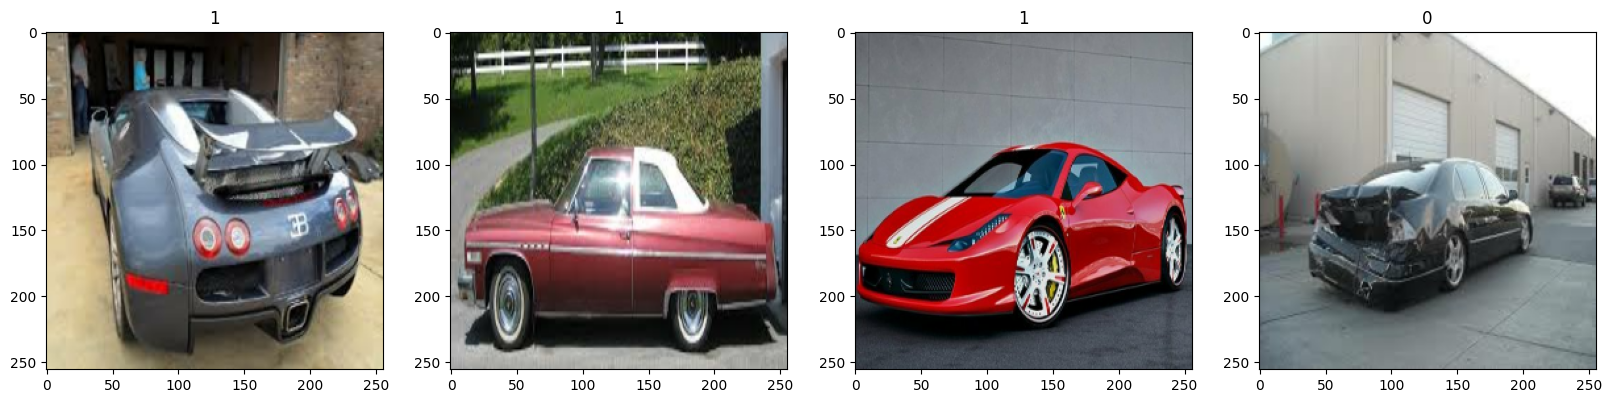

In [24]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batches[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batches[1][idx])

class  0 : Damaged

class  1 : Good

## 2. Preprocessing the Data

### `2.1 Scaling the Data`

In [25]:
data = data.map(lambda x,y : (x/255,y))

In [26]:
data.as_numpy_iterator().next()

(array([[[[0.54362744, 0.21421568, 0.175     ],
          [0.5485294 , 0.21519607, 0.1877451 ],
          [0.54656863, 0.20539215, 0.17794117],
          ...,
          [0.55441177, 0.16617647, 0.14656863],
          [0.5661765 , 0.17794117, 0.15833333],
          [0.5740196 , 0.1740196 , 0.15833333]],
 
         [[0.5446078 , 0.2112745 , 0.18382353],
          [0.5377451 , 0.20441176, 0.17696078],
          [0.55245095, 0.2112745 , 0.18382353],
          ...,
          [0.5598039 , 0.17156863, 0.15196079],
          [0.55735296, 0.16911764, 0.1495098 ],
          [0.5764706 , 0.1764706 , 0.16078432]],
 
         [[0.54068625, 0.20833333, 0.1882353 ],
          [0.54558825, 0.20049019, 0.18480392],
          [0.55245095, 0.20735294, 0.19166666],
          ...,
          [0.56764704, 0.17156863, 0.14019608],
          [0.5720588 , 0.17205882, 0.15637255],
          [0.57892156, 0.17892157, 0.15931372]],
 
         ...,
 
         [[0.62009805, 0.7102941 , 0.7651961 ],
          [0.61470

### `2.2 Splitting the Data`

In [27]:
len(data)

58

In [30]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.15)+1
test_size = int(len(data)*0.15)+1

In [31]:
train_size,val_size,test_size

(40, 9, 9)

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(train),len(val),len(test)

(40, 9, 9)

## 3. Building the Neural Network

### `3.1 Creating the CNN Model`

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [37]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

### `3.2 Training the NN`

In [43]:
logdir='logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
40/40 [==============================] - 21s 486ms/step - loss: 0.6451 - accuracy: 0.6141 - val_loss: 0.6420 - val_accuracy: 0.6528
Epoch 2/20
40/40 [==============================] - 19s 469ms/step - loss: 0.5969 - accuracy: 0.7016 - val_loss: 0.5978 - val_accuracy: 0.6632
Epoch 3/20
40/40 [==============================] - 19s 471ms/step - loss: 0.5009 - accuracy: 0.7563 - val_loss: 0.4478 - val_accuracy: 0.8021
Epoch 4/20
40/40 [==============================] - 19s 475ms/step - loss: 0.4494 - accuracy: 0.7859 - val_loss: 0.4107 - val_accuracy: 0.8021
Epoch 5/20
40/40 [==============================] - 19s 476ms/step - loss: 0.4425 - accuracy: 0.7937 - val_loss: 0.3479 - val_accuracy: 0.8542
Epoch 6/20
40/40 [==============================] - 19s 476ms/step - loss: 0.3938 - accuracy: 0.8273 - val_loss: 0.3705 - val_accuracy: 0.8403
Epoch 7/20
40/40 [==============================] - 23s 570ms/step - loss: 0.3541 - accuracy: 0.8367 - val_loss: 0.3852 - val_accuracy: 0.8264

In [49]:
hist.history

{'loss': [0.6451206207275391,
  0.5968760251998901,
  0.5009444952011108,
  0.4494228959083557,
  0.4425109326839447,
  0.393784761428833,
  0.35405680537223816,
  0.29243776202201843,
  0.2551119923591614,
  0.21489091217517853,
  0.19955499470233917,
  0.1601172387599945,
  0.1471465677022934,
  0.09135964512825012,
  0.05492229387164116,
  0.057755060493946075,
  0.1554984450340271,
  0.048890452831983566,
  0.03918151184916496,
  0.03850260004401207],
 'accuracy': [0.614062488079071,
  0.7015625238418579,
  0.7562500238418579,
  0.785937488079071,
  0.793749988079071,
  0.827343761920929,
  0.836718738079071,
  0.8843749761581421,
  0.891406238079071,
  0.917187511920929,
  0.930468738079071,
  0.9468749761581421,
  0.94921875,
  0.973437488079071,
  0.985156238079071,
  0.981249988079071,
  0.948437511920929,
  0.984375,
  0.987500011920929,
  0.987500011920929],
 'val_loss': [0.6420100331306458,
  0.597836434841156,
  0.44783979654312134,
  0.41069501638412476,
  0.34788691997528

### `3.3 Plotting Performance`

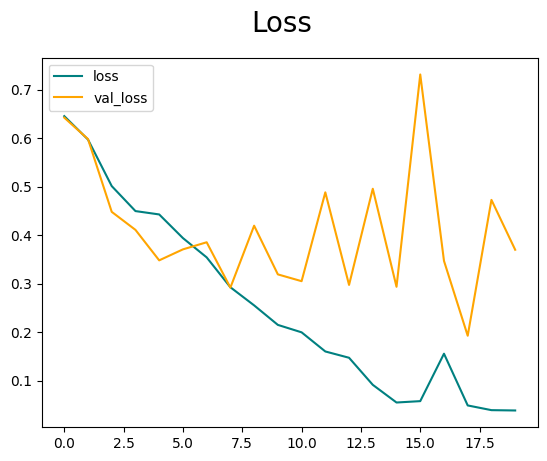

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

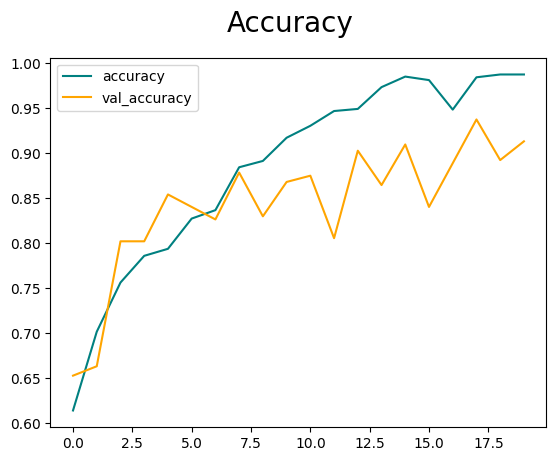

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Evaluating the Performance

In [52]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
len(test)

9

In [54]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)    
    acc.update_state(y,yhat) 

1/1 [==============================] - 0s 121ms/step


In [56]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.9076923, shape=(), dtype=float32) tf.Tensor(0.83687943, shape=(), dtype=float32) tf.Tensor(0.8713235, shape=(), dtype=float32)


## 5. Testing and Saving

In [57]:
import cv2

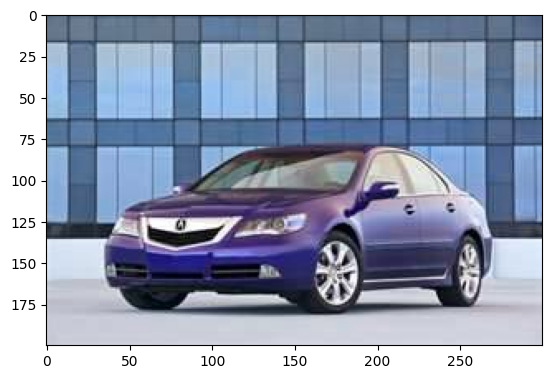

In [64]:
img = cv2.imread('test2.jpg')
plt.imshow(img)
plt.show()

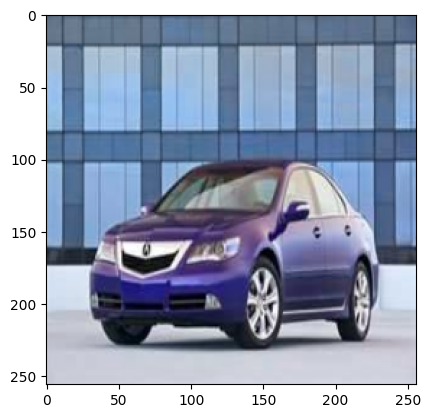

In [65]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 27ms/step


In [67]:
yhat

array([[0.99999887]], dtype=float32)

In [68]:
if yhat<0.5:
    print('Damaged')
else:
    print('Not damaged')

Not damaged


In [71]:
model.save(os.path.join('models','damagedcarmodel.h5'))